In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime
from dateutil import parser

In [492]:
#loading data into dataframe
df = pd.read_csv(r"C:\Users\mnepoli\Downloads\ML & Deep Learning\Project 1 - LendingClubCaseStudy\loan.csv")
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

C:\Users\mnepoli\AppData\Local\Temp\ipykernel_14696\2646335828.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\mnepoli\Downloads\ML & Deep Learning\Project 1 - LendingClubCaseStudy\loan.csv")


In [494]:
df.dropna(how='all', axis='columns', inplace=True)  

In [495]:
df.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,2786.000000,39020.000000
mean,11219.443815,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,69.698134,0.043260
std,7456.670694,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,43.822529,0.204324
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,22.000000,0.000000
50%,10000.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,0.000000
75%,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,104.000000,0.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,2.000000


In [496]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,NaN,NaN,NaN,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,NaN,NaN,NaN,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,NaN,NaN,NaN,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,35.0,NaN,NaN,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,38.0,NaN,Jun-16,0.0


In [493]:
#Data Cleaning
# Filtering columns which should be dropped from the dataset
columns_to_drop = [
                   'id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code',
                   'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                   'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
                   'delinq_amnt', 'tax_liens','collection_recovery_fee', 'inq_last_6mths',
                   'pymnt_plan', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
                   'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
                    'last_credit_pull_d', 'funded_amnt' 
                  ]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [497]:
# I need to remove loan_status that are current
# I need to remove this because this I can't predict the behaviour using current
df = df[df.loan_status != "Current"]
df.shape

(38577, 19)

In [498]:
# Now lets clean up/ modify few columns based on % missing data
missing_data = (df.isna().sum()/len(df.index))*100

cols_gt_60_percent = []
for k,v in missing_data.items():
    if v > 60:
        cols_gt_60_percent.append(k)

# mths_since_last_delinq     64.559193
# mths_since_last_record     92.897322
# next_pymnt_d              100.000000 < -- this is not given correctly by pandas lib
df.drop(cols_gt_60_percent, axis = 1, inplace = True)

In [499]:
df.shape

(38577, 16)

In [500]:
df['term'] = list(map(lambda a:a.split(' ')[1], df['term']))

In [501]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [502]:
# Formatting int_rate column to remove % and converting result to a float
df['int_rate'] = df['int_rate'].apply(lambda x:x.strip("%"))
df['int_rate'] = df['int_rate'].astype('float')
# Converting annual_inc and funded_amnt_inv to int as there are very few having float values
df['annual_inc'] = df['annual_inc'].apply(lambda x:int(x))
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x:int(x))
# Finding columns which needs to be filled properly 
df.isna().sum() 

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [503]:
# Taking mode to fill na values for emp_length and pub_rec_bankruptcies
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace = True)
df['emp_length']
df['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [504]:
# Here I see 9 bins are already proper only < 1 year and 10+ years needs to be corrected
# I are making < 1 year as 0 year and 10+ years as 10
df['emp_length'] = df['emp_length'].map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [505]:
df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [506]:
# Derived Metrics
# I should convert issue_d to datetime object and extract year and month
df['issue_d'] = pd.to_datetime(df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y')
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,12-2011,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,12-2011,Charged Off,car,GA,1.00,0.0,2011,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,12-2011,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,12-2011,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,12-2011,Fully Paid,wedding,AZ,11.20,0.0,2011,12


<Axes: title={'center': 'boxplot'}>

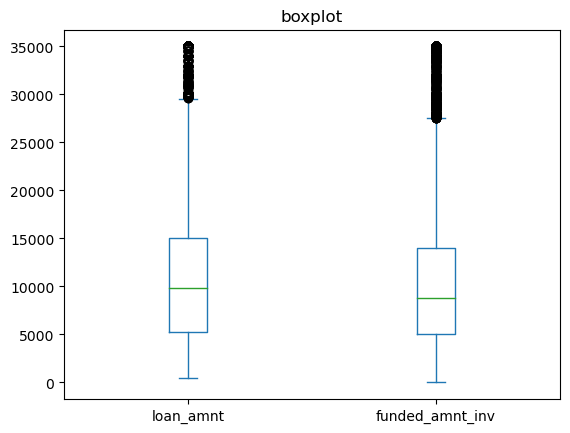

In [507]:
# Remove outliers for funded_amnt_inv column
# Records whose funded_amnt_inv is 0 can not have any int_rate or loan_status as Fully Paid or charged off.
df = df[df['funded_amnt_inv'] != 0]
df.shape
# Univariate Analysis
# Finding outliers in loan_amnt, funded_amnt_inv, annual_inc, int_rate, dti
# First checking outliers in loan_amnt and funded_amnt_inv as their ranges are similar
df[['loan_amnt', 'funded_amnt_inv']].plot(kind='box', title='boxplot')

<Axes: title={'center': 'boxplot'}>

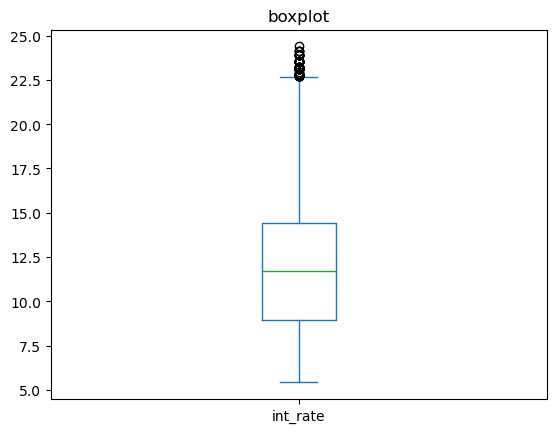

In [508]:
# Data looks fine for loan_amnt and funded_amnt_inv and doesn't seem to have outliers
# Checking int_rate
df[['int_rate']].plot(kind='box', title='boxplot')

<Axes: title={'center': 'boxplot'}>

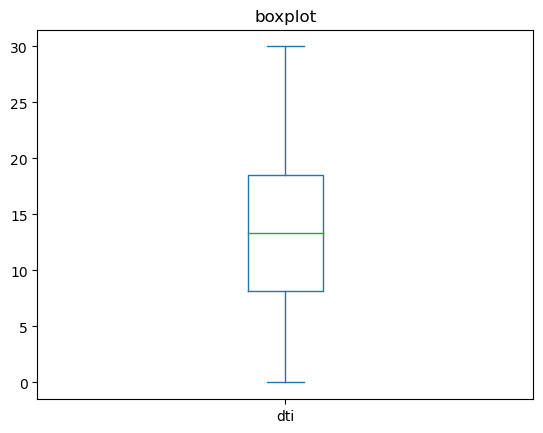

In [509]:
# Data looks fine for int_rate and doesn't seem to have outliers
# Checking dti
df[['dti']].plot(kind='box', title='boxplot')

<Axes: title={'center': 'boxplot'}>

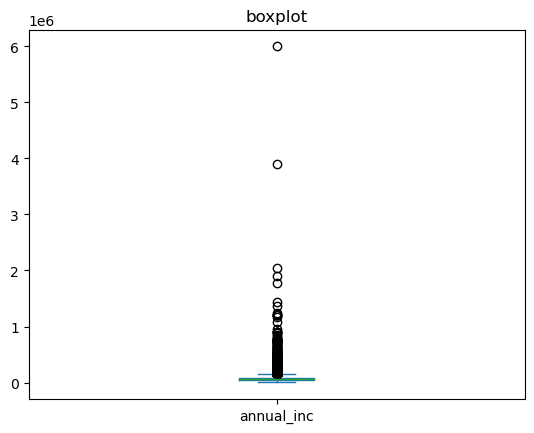

In [510]:
# Data looks fine for dti and doesn't seem to have outliers
# Checking annual_inc
df[['annual_inc']].plot(kind='box', title='boxplot')

In [511]:
outlier_finder_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
df.annual_inc.quantile(outlier_finder_range)

0.00       4000.00
0.10      30000.00
0.20      37200.00
0.30      44680.00
0.40      50004.00
0.50      59000.00
0.60      65159.20
0.70      75000.00
0.80      90000.00
0.90     115172.40
0.91     120000.00
0.92     122004.00
0.93     127786.18
0.94     134609.12
0.95     140004.00
0.96     150000.00
0.97     165000.00
0.98     187000.00
0.99     234444.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [512]:
# I can clearly see that data after 95% or 0.95 is in range of outlier
outlier_quatile_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= outlier_quatile_annual_inc]

In [513]:
df.shape

(36509, 18)

In [514]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,12-2011,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,12-2011,Charged Off,car,GA,1.00,0.0,2011,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,12-2011,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,12-2011,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,12-2011,Fully Paid,wedding,AZ,11.20,0.0,2011,12


In [515]:
# Derived Metrics
# Heatmap
df['defaulter'] = [0 if x == 'Fully Paid' else 1 for x in df['loan_status']]

Text(0, 0.5, 'Count')

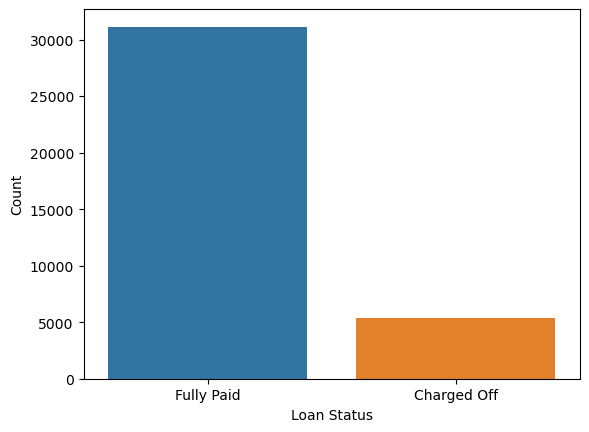

In [516]:
# Bivariate Analysis
# I will compare loan_status with rest of the columns to find the Defaulter pattern
# loan_status : Charged Off and Fully Paid
# I will compare results of both Charged Off and Fully Paid
# Fully paid vs Charged Off 
sbn.countplot(x = 'loan_status', data = df)
plt.xlabel('Loan Status')
plt.ylabel('Count')

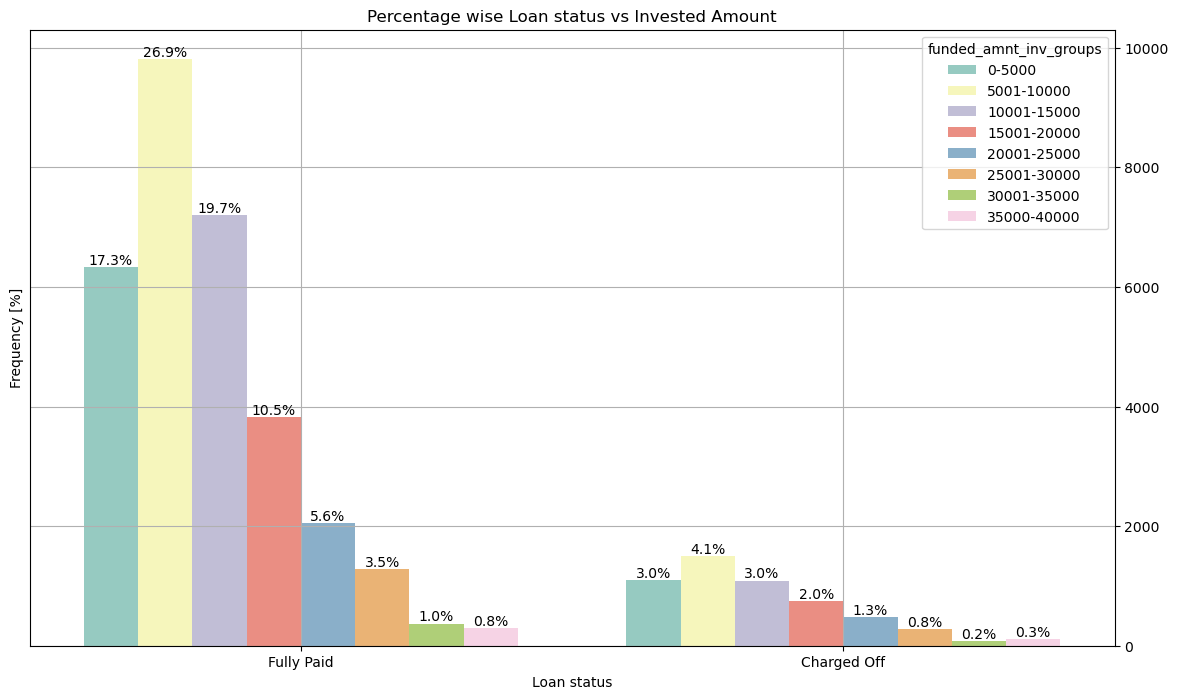

In [517]:
# create_feature_bins will create a new feature group for a feature in dataframe
def create_feature_bins(df1, var_type):
    # For some fields like emp_length, term etc I already have bins but for other making now
    group_attribute = ""
    if (var_type == 'funded_amnt_inv'):
        df1['funded_amnt_inv_groups'] = pd.cut(df['funded_amnt_inv'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'funded_amnt_inv_groups'
        
    elif (var_type == 'loan_amnt'):
        df1['loan_amount_groups'] = pd.cut(df['loan_amnt'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'loan_amount_groups'
        
    elif (var_type == 'int_rate'):
        df1['int_rate_groups'] = pd.cut(df['int_rate'], bins=5, precision=0, 
                                       labels =['0-5', '6-10', '11-15', '16-20', '21-25'])
        group_attribute = 'int_rate_groups'
        
    elif(var_type == 'annual_inc'):
        df1['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=8, precision=0, 
                                       labels =['0-20000', '20001-40000','40001-60000', '60001-80000',
                                                '80001-100000', '100001-120000', '120001-140000','140001-160000'])
        group_attribute = 'annual_inc_groups'
        
    elif(var_type == 'dti'):
        df1['dti_groups'] =   pd.cut(df['dti'], bins=6, precision=0,
                                   labels =['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']) 
        group_attribute = 'dti_groups'
        
    return group_attribute
# plt_graph is a generic function to draw various plots
def plt_graph(df, x_var, x_label, title, hue_var=None, rot_flag=0, fig_size_x=14, fig_size_y=8):
    
    num_records = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sbn.countplot(x=x_var, data=df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    ax.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/num_records), (x.mean(), y), 
                ha='center', va='bottom') 

    
    ax.grid(None)
# Analyzing funded_amnt_inv for charged off vs fully paid
group_attribute = create_feature_bins(df, 'funded_amnt_inv')
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Invested Amount', group_attribute)

# Analysis
# funded_amnt_inv is positively correlated with both Charged off and Fully Paid
# Employees who have exp 10+, 0, 2 & 3 years are likely to become Defaulters

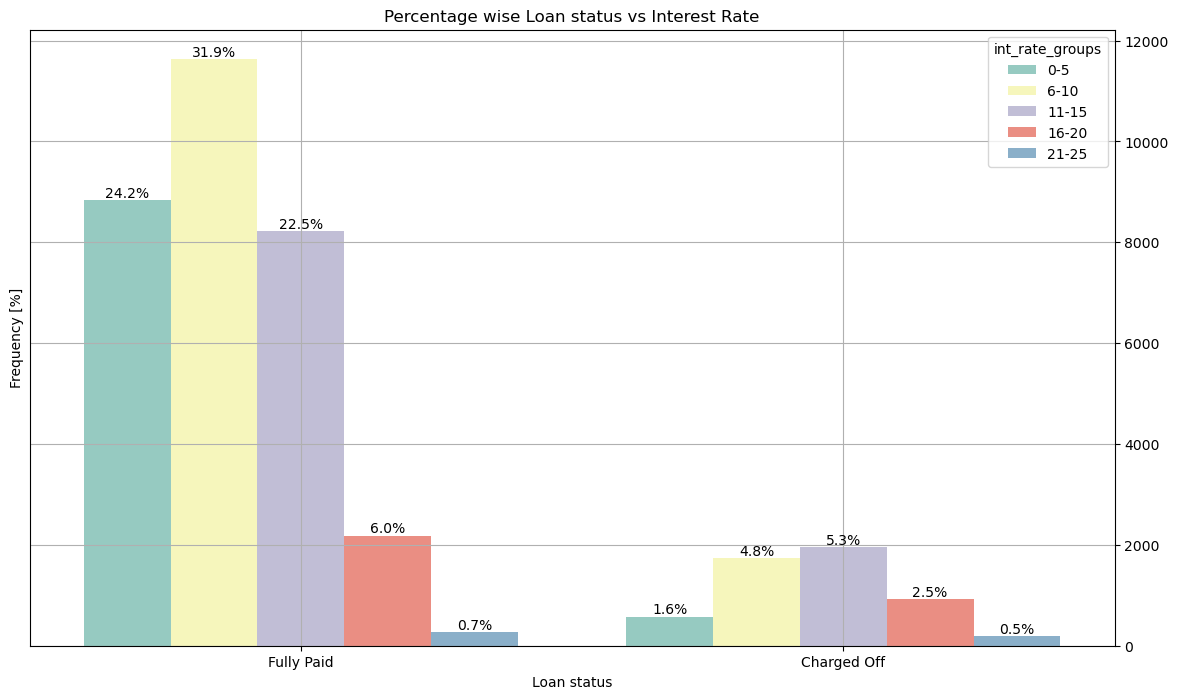

In [518]:
# int_rate for charged off vs fully paid
group_attribute = create_feature_bins(df, 'int_rate')
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Interest Rate', group_attribute)

# Analysis 
# I see int_rate is positively correlated with both Charged off and Fully Paid 
# I also see if int_rate rate is in range of 11% to 15% then chances of becoming defaulter is higher
# But ratio wise 21-25 % int rate group has higher chances of becoming defaulter

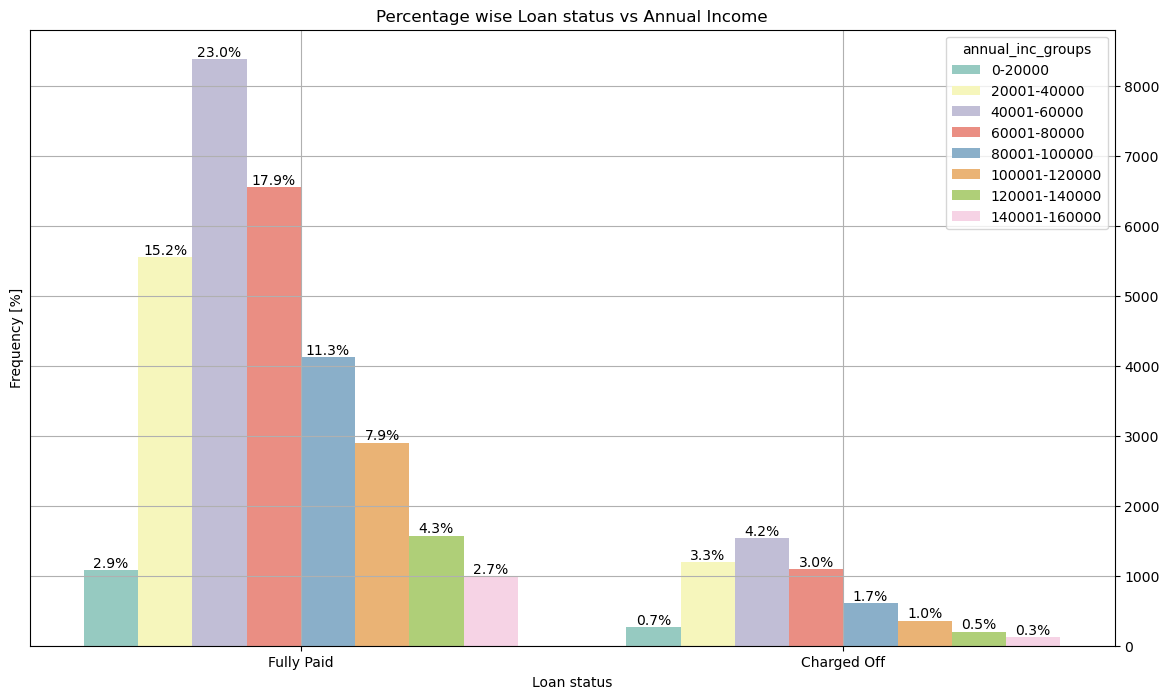

In [519]:
# annual_inc for charged off vs fully paid
group_attribute = create_feature_bins(df, 'annual_inc')
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Annual Income', group_attribute)

# Analysis 
# I see annual_inc is positively correlated with both Charged off and Fully Paid
# I also see if annual_inc is in range of 40001 to 60000 then chances of becoming defaulter is higher
# Looking at the ratio of say charged off/ Fully Paid --> say for 0-20000, 0.7/2.9 nearly = 24.13 has higher chances of becoming defaulter

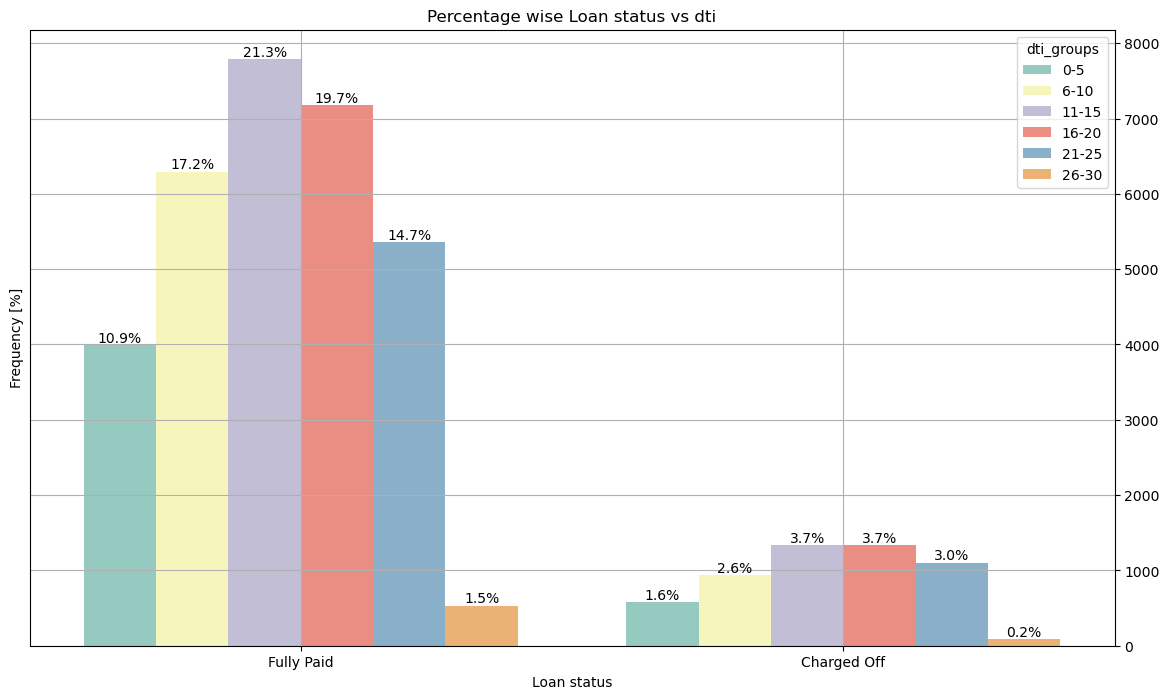

In [520]:
# dti for charged off vs fully paid
group_attribute = create_feature_bins(df, 'dti')
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs dti', group_attribute)  

# Analysis 
# I see dti is positively correlated with both Charged off and Fully Paid
# I also see if dti is in range of either 11 to 15 or 16-20 then chances of becoming defaulter is higher

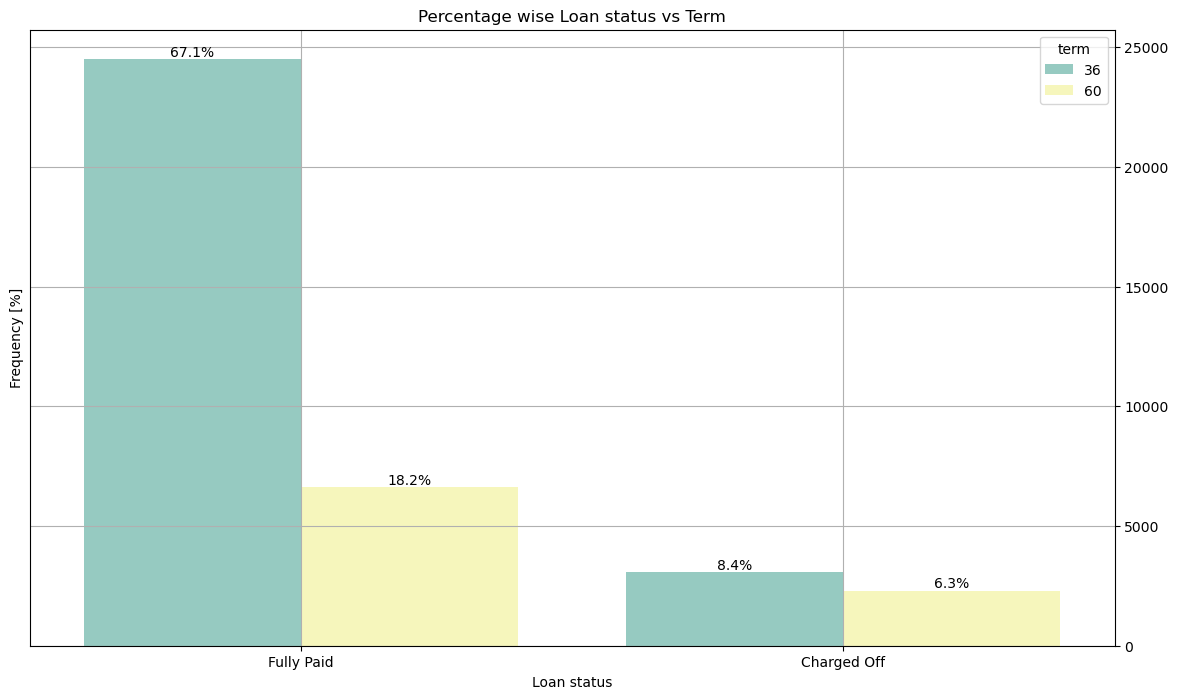

In [521]:
# term for charged off vs fully paid
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Term','term')   

# Analysis 
# I see term is positively correlated with both Charged off and Fully Paid 
# I also see if term is 36 months then chances of becoming defaulter is higher
# But ratio wise 60 months has much higher number

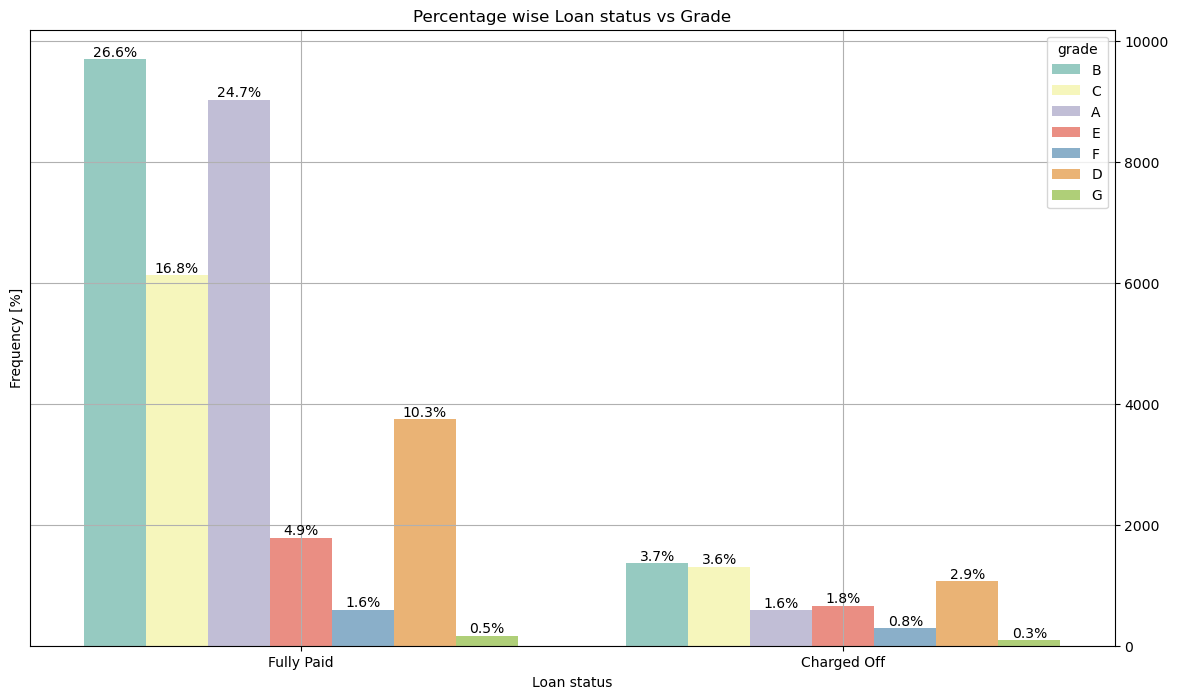

In [522]:
#grade for charged off vs fully paid
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Grade','grade')   

# Analysis
# I see term is positively correlated with both Charged off and Fully Paid
# I also see if grade is B then chances of becoming defaulter is higher
# But ratio wise G has higher chances of being defaulter

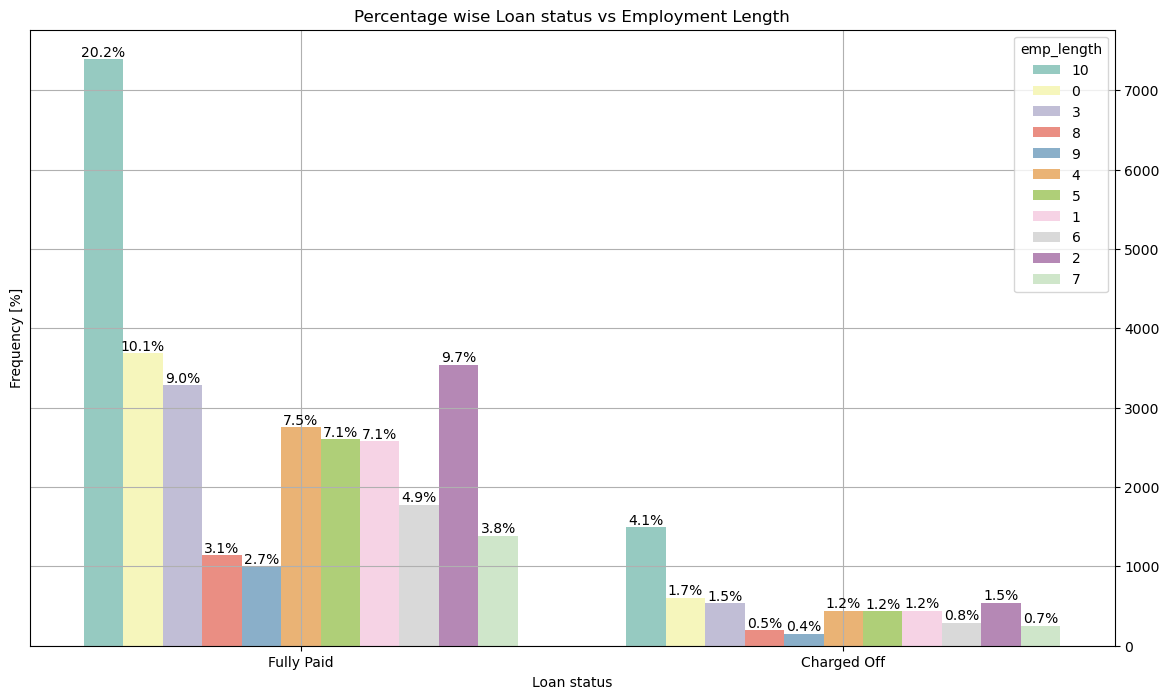

In [523]:
# Employment Length for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Employment Length','emp_length')   

# Analysis
# I see emp length is positively correlated with both Charged off and Fully Paid
# Basically, emp length may not be a good criteria to detect Defaulters
# Also I see that Employees who have exp 10+, 0, 2 & 3 years are likely to become Defaulters

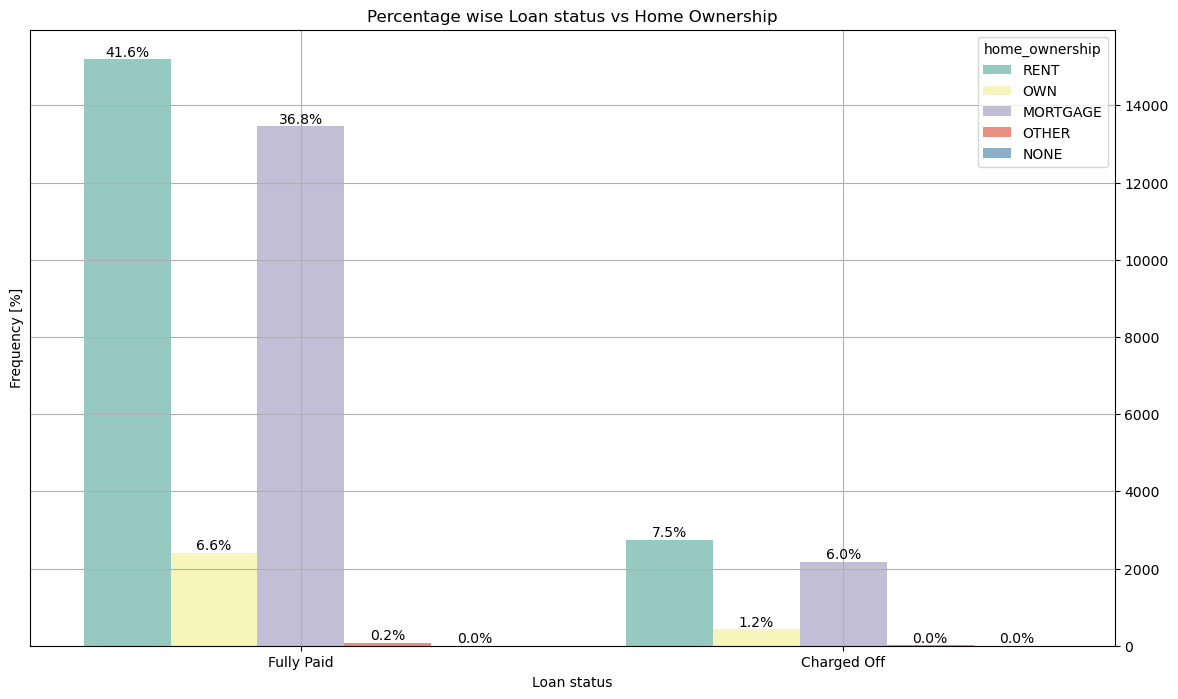

In [524]:
# Home Ownership for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Home Ownership','home_ownership')   

# Analysis
# I see home_ownership is positively correlated with both Charged off and Fully Paid
# I also see if home_ownership is either RENT or MORTGAGE then chances of becoming defaulter is higher

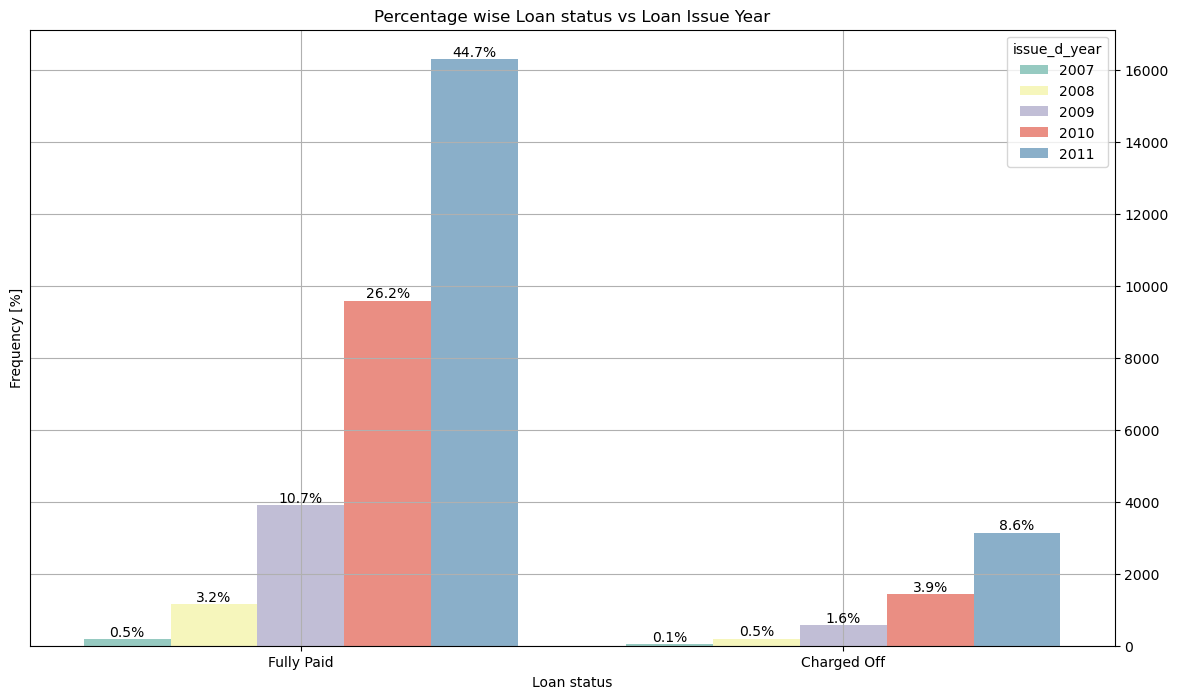

In [525]:
# Loan Issue Year for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','issue_d_year')   

# Analysis
# I see issue_d_year is positively correlated with both Charged off and Fully Paid 
# I also see if issue_d_year is 2011 then chances of becoming defaulter is higher 

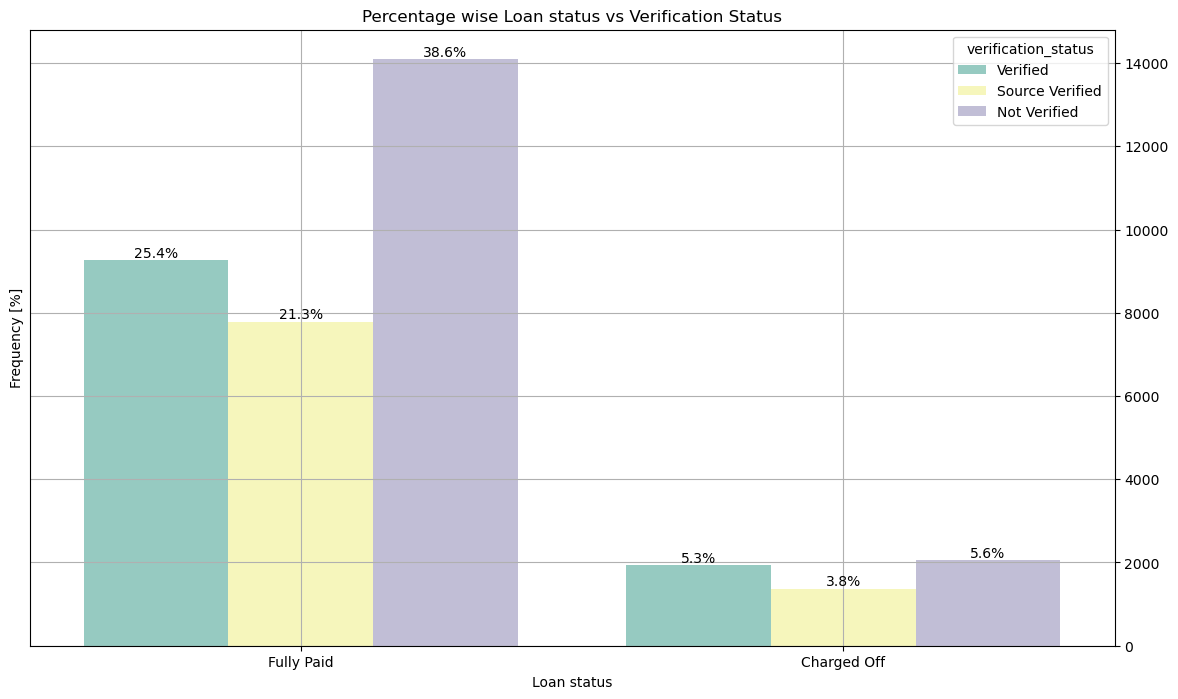

In [526]:
# Verification Status for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Verification Status','verification_status')   

# Analysis
# I see verification_status is positively correlated with both Charged off and Fully Paid 
# I also see if verification_status is not verified then chances of becoming defaulter is higher 
# But percentage wise Verified also has higher chances of being defaulter

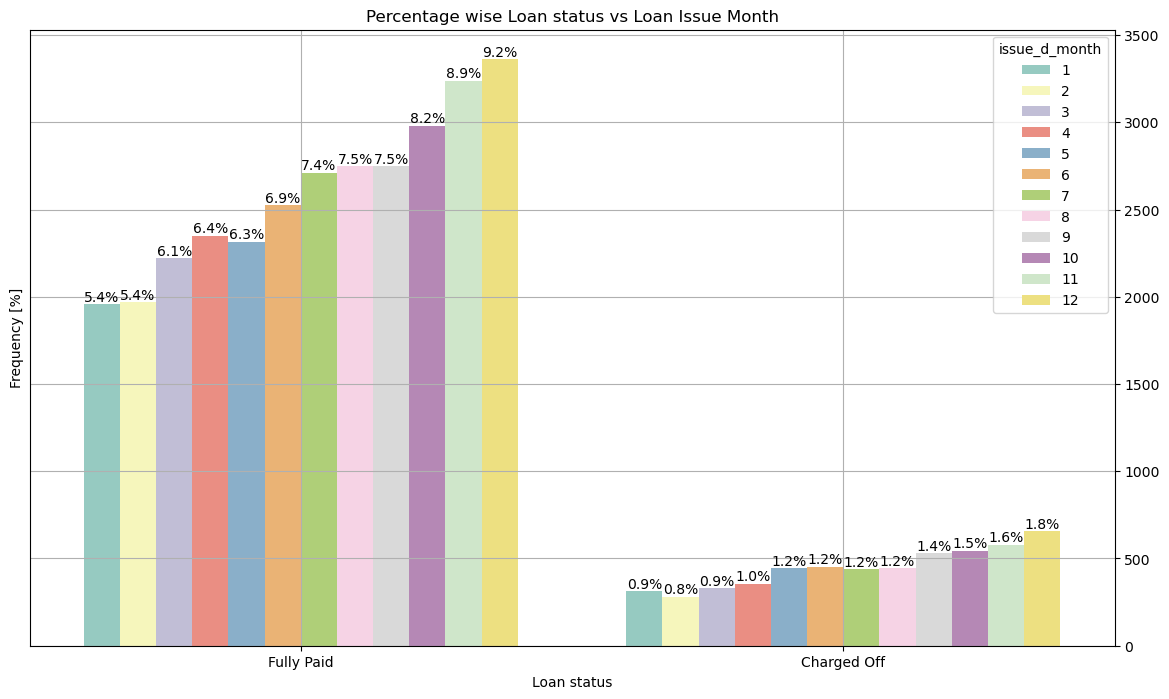

In [527]:
# Loan Issue Month for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Month','issue_d_month')   

# Analysis
# I see issue_d_month is positively correlated with both Charged off and Fully Paid
# I also see if issue_d_month is either Dec or Nov then chances of becoming defaulter is higher

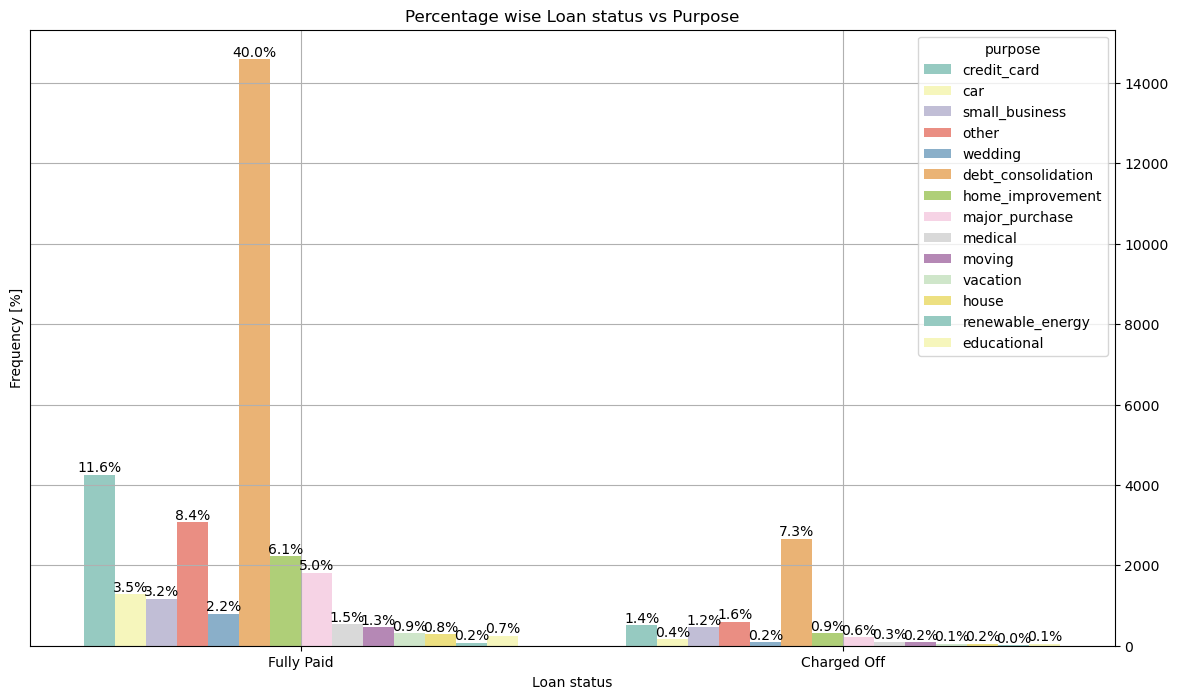

In [528]:
# Purpose for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Purpose','purpose')   

# Analysis
# I see purpose is positively correlated with both Charged off and Fully Paid 
# I also see if purpose is debt_consolidation then chances of becoming defaulter is higher

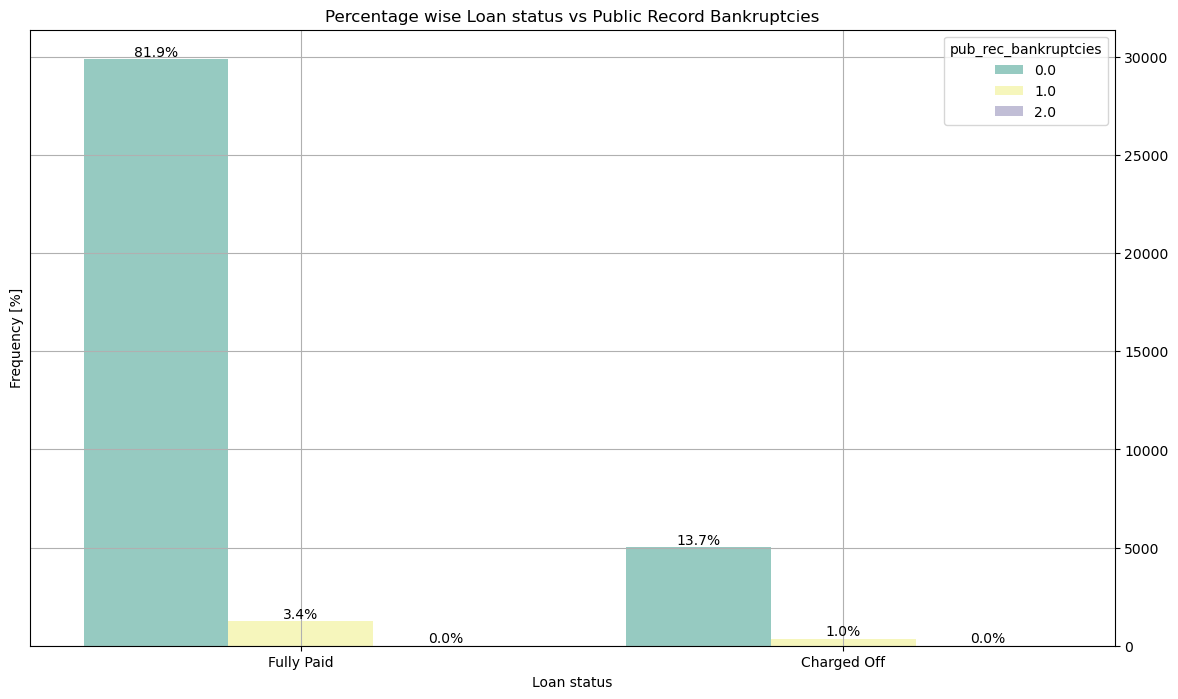

In [529]:
# Number of public record bankruptcies for charged off vs Fully paid 
plt_graph(df, "loan_status",'Loan status','Percentage wise Loan status vs Public Record Bankruptcies','pub_rec_bankruptcies')   
# I see pub_rec_bankruptcies is positively correlated with both Charged off and Fully Paid. 
# I also see if pub_rec_bankruptcies is 0 then chances of becoming defaulter is higher. 

C:\Users\mnepoli\AppData\Local\Temp\ipykernel_14696\480344267.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


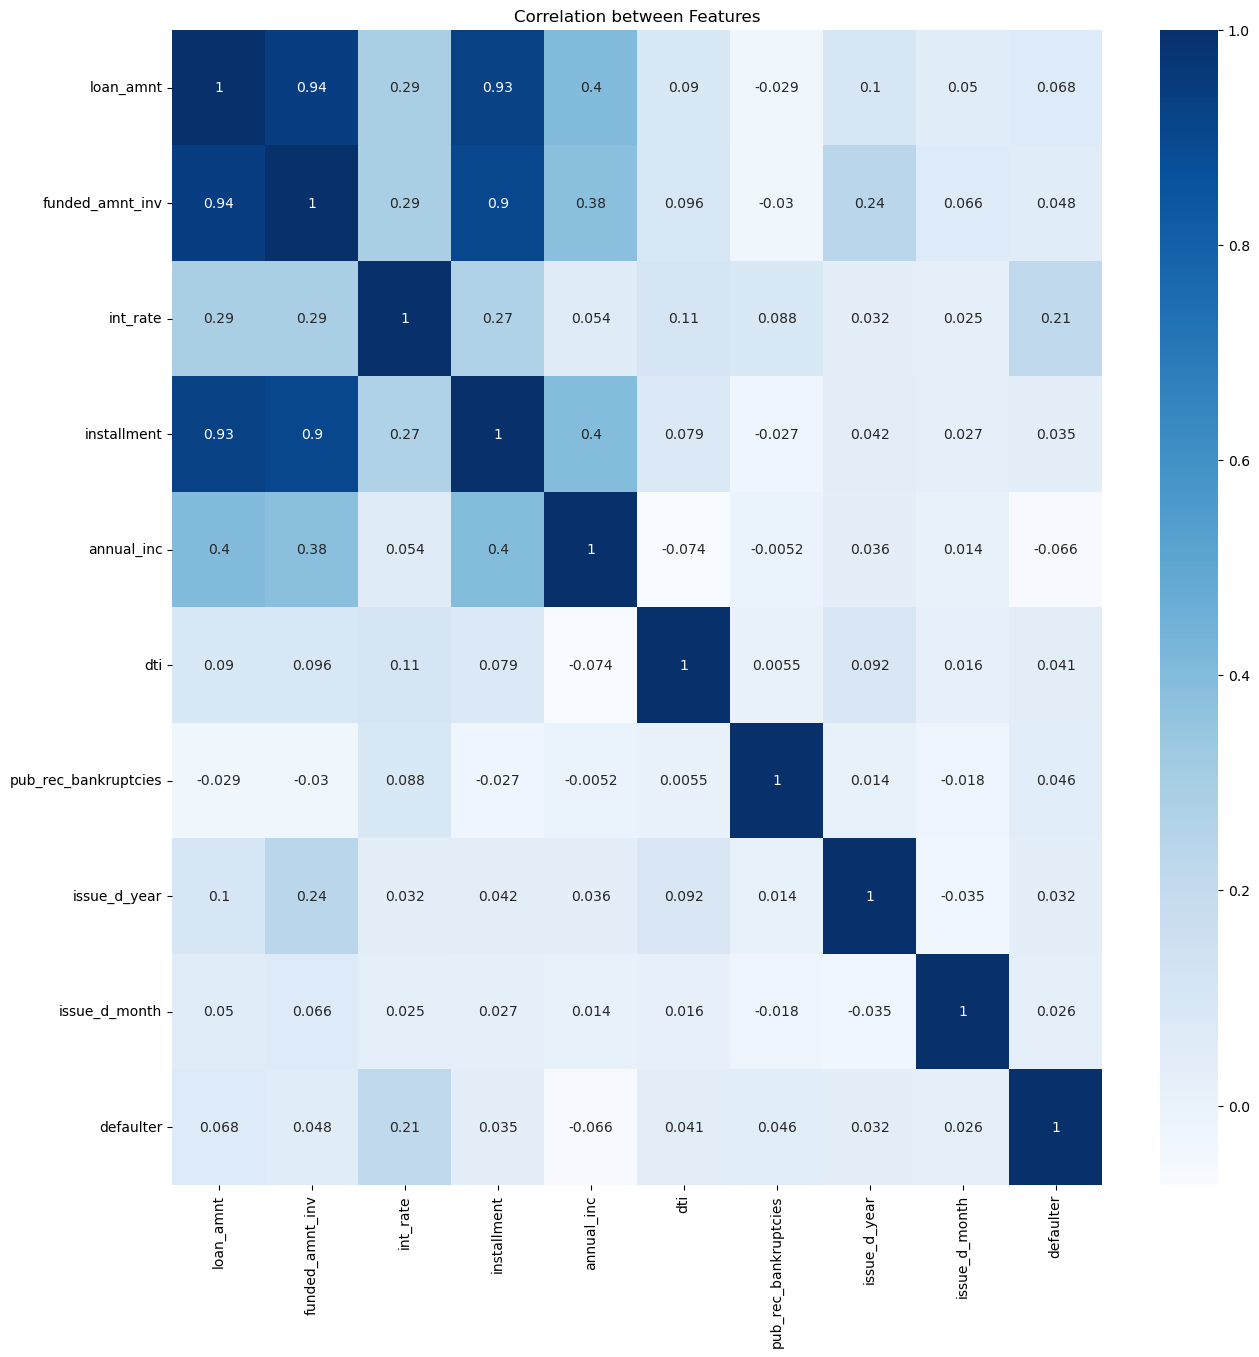

In [532]:
# heatmap

corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
#plotting correlation matric on a heat map
ax = sbn.heatmap(corr_matrix, annot = True, cmap='Blues')
plt.title("Correlation betIen Features")
plt.show()

In [533]:
corr_matrix

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,defaulter
loan_amnt,1.000000,0.938483,0.290811,0.931504,0.403118,0.089771,-0.029062,0.100405,0.049842,0.067736
funded_amnt_inv,0.938483,1.000000,0.288521,0.903822,0.382836,0.096304,-0.030454,0.238797,0.066061,0.048105
int_rate,0.290811,0.288521,1.000000,0.268695,0.053604,0.110729,0.088416,0.032296,0.025014,0.213302
installment,0.931504,0.903822,0.268695,1.000000,0.398158,0.078809,-0.027064,0.041975,0.026869,0.034510
annual_inc,0.403118,0.382836,0.053604,0.398158,1.000000,-0.073651,-0.005227,0.036159,0.013546,-0.066138
dti,0.089771,0.096304,0.110729,0.078809,-0.073651,1.000000,0.005474,0.091766,0.016288,0.041181
pub_rec_bankruptcies,-0.029062,-0.030454,0.088416,-0.027064,-0.005227,0.005474,1.000000,0.014029,-0.017713,0.046455
issue_d_year,0.100405,0.238797,0.032296,0.041975,0.036159,0.091766,0.014029,1.000000,-0.035341,0.032427
issue_d_month,0.049842,0.066061,0.025014,0.026869,0.013546,0.016288,-0.017713,-0.035341,1.000000,0.025965
defaulter,0.067736,0.048105,0.213302,0.034510,-0.066138,0.041181,0.046455,0.032427,0.025965,1.000000


In [535]:
# During correlation matrix analysis I found it needs data to be of numeric type

# Converting object type to int for term feature
df['term'] = [int(x) for x in df['term']] 

# Converting object type to int for term feature 
df['emp_length'] = [int(x) for x in df['emp_length']] 

# Converting grade to A to G, A=65 , B=66 ...
df['grade'] = [ord(x) for x in df['grade']] 

# Converting home_owner type to int
home_ownership_map = {
    'RENT': 1,
    'MORTGAGE': 2,
    'NONE': 3,
    'OTHER': 4,
    'OWN': 5
}
df['home_ownership'] = [home_ownership_map[x] for x in df['home_ownership']]

# Converting verification type to int
verification_map = {
    'Verified': 1,
    'Not Verified': 2,
    'Source Verified': 3
}
df['verification_status'] = [verification_map[x] for x in df['verification_status']]

# Converting purpose type to int
# set(df.purpose.to_list()) gives list of unique values
purpose_type_map = {
 'car' : 1,
 'credit_card' : 2,
 'debt_consolidation': 3,
 'educational': 4,
 'home_improvement': 5,
 'house': 6,
 'major_purchase': 7,
 'medical': 8,
 'moving': 9,
 'other': 10,
 'renewable_energy': 11,
 'small_business': 12,
 'vacation': 13,
 'Idding': 14
}
df['purpose'] = [purpose_type_map[x] for x in df['purpose']]

# Converting state to int
all_states = set(df.addr_state.to_list())
states_map = {}
i = 1 
for state in all_states:
    states_map[state] = i
    i += 1
df['addr_state'] = [states_map[x] for x in df['addr_state']]

C:\Users\mnepoli\AppData\Local\Temp\ipykernel_14696\2162189259.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


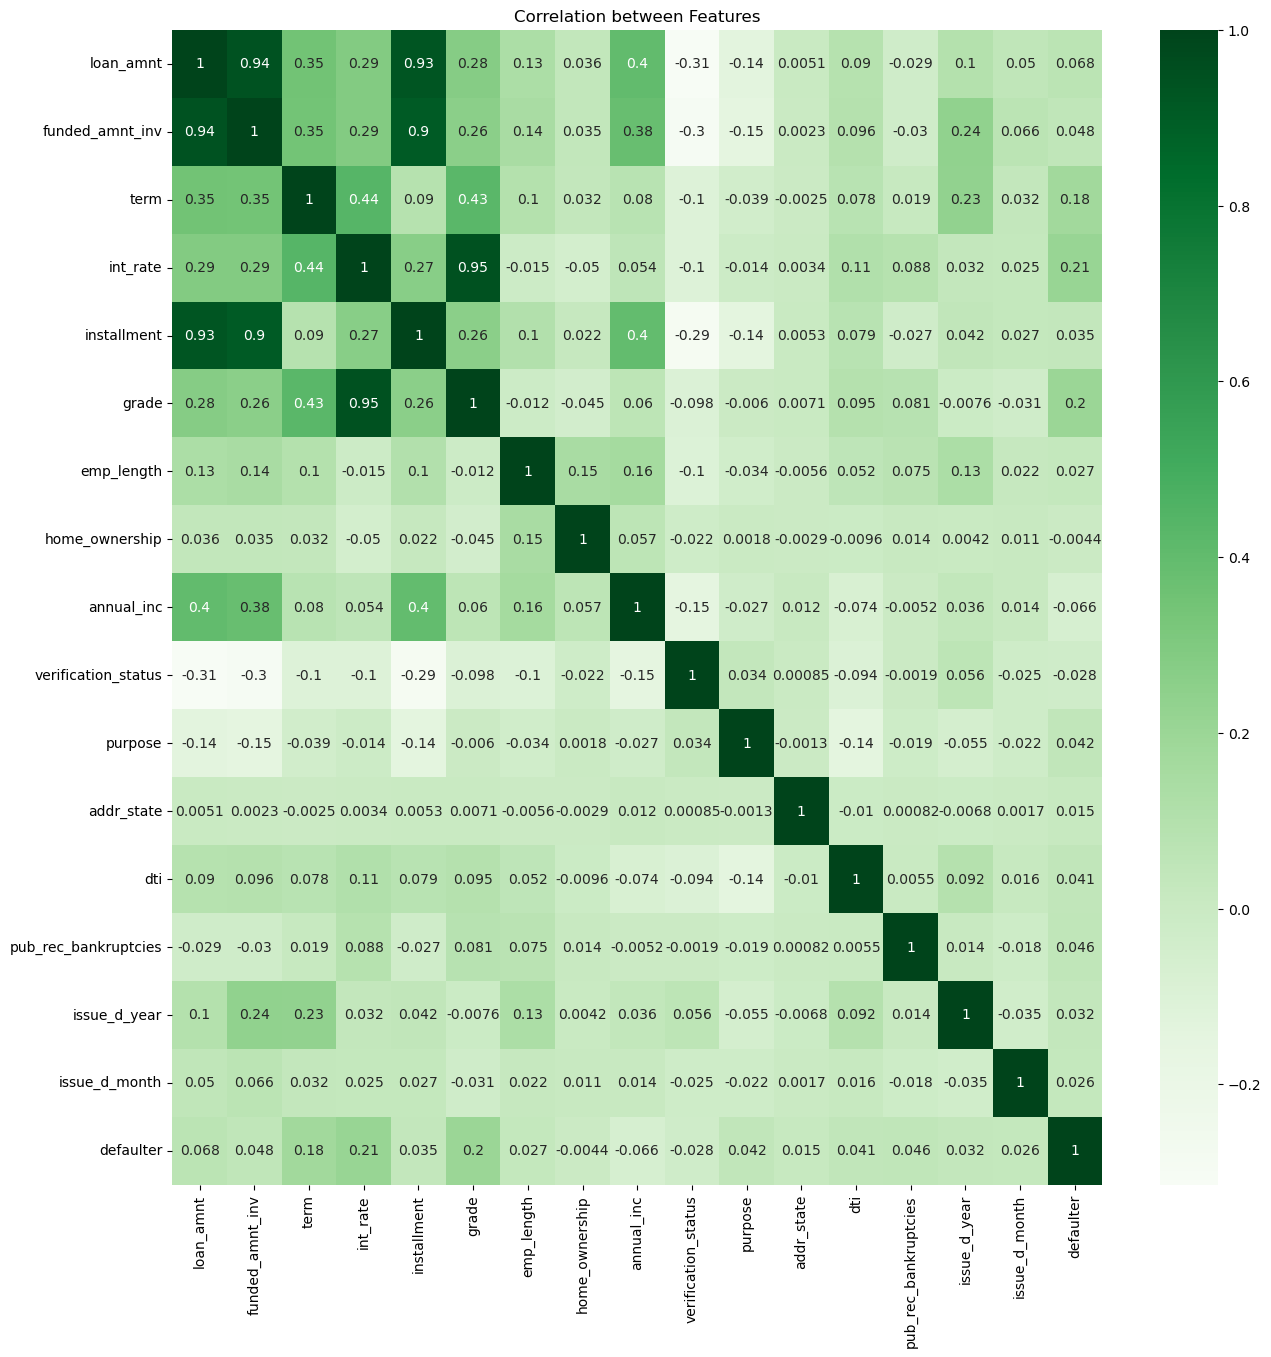

In [536]:
# Drawing heatmap

corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
#plotting correlation matrix on a heat map
ax = sbn.heatmap(corr_matrix, annot = True, cmap='Greens')
plt.title("Correlation betIen Features")
plt.show()

In [ ]:
# Based on heatmap it is observed that it is Negatively Correlated
# home_ownership, annual_inc and verification_status with defaulter

# A. If home_ownership is RENT or Mortgage then chances of becoming defaulter is higher

# B. If verification_status is verified then chances of becoming defaulter is higher

# C. For Annual income - Looking at the ratio of say charged off/ Fully Paid - say for 0-20000 range, 0.7/2.9 nearly = 24.13 
# has higher chances of becoming defaulter. Heatmap is also confirming this

# Postively correlated 
# term, int_rate, grade 
# Other features are also postively corelated but they are very less as compared to term, int_rate and grade

# A. So higher the term greater will be chances of becoming defaulter - 60 months
# B. Higher the int_rate means higher the chances of becoming defaulter - 21-25% 
# C. Higher the grade means higher the chances of becoming defaulter - G